·遗传算法

遗传算法是从代表问题可能潜在的解集的一个种群开始的，而一个种群则由经过基因编码的一定数目的个体组成。因此，第一步需要实现从表现型到基因型的映射即编码工作，初代种群产生之后，按照适者生存和优胜劣汰的原理，逐代烟花产生出来越来越好的近似解，在每一代，根据问题域中个体的适应度大小选择个体，并借助于自然遗传学的遗传算子进行组合交叉和变异，产生出代表新的解集的种群。最终末代种群中的最优个体经过解码，可以作为问题近似最优解。

遗传算法有三个基本操作，选择，交叉，变异
    ·选择：从当前群体中选出优良的个体，使他们有机会作为父代繁衍下一代，根据每个个体的适应度值，按照一定的规则或方法从上一代群体中选择出一些优良的个体一传给下一代。选择的依据是适应性强的个体为下一代贡献一个或多个后代的概率大
    ·交叉：通过交叉操作可以得到新一代个体，新个体组合了父辈个体的特性，将群体中各个个体随机搭配成双对，对每一个个体，一交叉概率交换它们之间的那部分染色体
    ·变异：对种群中的每一个个体，以变异概率改变某一个或多个基因座上的基因值为其他的等位基因。同生物界中一样，变异发生的概率很低，变异为新个体的产生提供了机会。

In [1]:
import numpy as np
def Decimal_conversion(pop):#进制转换
    pop1=np.zeros([len(pop),20])
    for j in range(20):
        pop1[:,j]=pop[:,j]*2**(20-j)#按位权值展开
    temp=np.sum(pop1,1)
    pop2=0+temp*((10-0)/2**20)
    return pop2
pop1=np.round(np.random.uniform(0,1,(100,20)))
print(pop1)
pop2=Decimal_conversion(np.round(np.random.uniform(0,1,(100,20))))
print(pop2)


[[1. 0. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 1.]]
[10.35232544 12.03399658  4.81336594 10.76128006 11.90877914 14.53987122
  3.26789856 19.81723785  5.20084381  2.83191681 11.14189148  0.40391922
 13.29900742  6.03208542 12.26003647 15.73959351  4.8956871  11.71728134
  9.76392746 12.95907974 11.58683777  7.50982285  2.32177734 11.46848679
 18.38169098  4.13036346  3.85538101 13.88240814 11.95858002 13.93201828
  7.48935699  9.85128403 11.78718567 11.97711945 19.71912384 19.78075027
 18.34444046  6.51765823  4.99320984  8.24367523  8.5607338   1.32749557
 16.56024933  4.27284241  1.75867081  6.14595413 18.88879776  9.48078156
  1.78243637 19.2137146   1.26537323  2.36459732 14.09276962 14.34247971
  5.7673645  16.74104691 19.78298187 18.51066589 13.65877151 14.34755325
  6.76733017 18.7087059   3.1709671   7.02968597  6.66210175 17.81972885
 19.45684433  2.441082    2.02804565  4.4

In [ ]:
def pop_choose(fitvalue):#选择操作（轮盘赌法）
    newpop=[]
    p_fitvalue1=fitvalue/np.sum(fitvalue)
    p_fitvalue=np.cumsum(p_fitvalue1)
    p_rand=np.sort(np.random.uniform(0,1,(self.px,1)))#px行，1列个由小到大排序的随机数
    #用p_rand去与做完了累计和的p_fitvalue作比较
    #适应度越高就有越大的几率在p_fitvalue的累计和中占据更大的区间
    #将会有更多的p_rand值落在中间
    #用这种方法保留下了适应度值较大的基因
    i=1#指向随机数的指针
    j=1#指向累计和区间的指针
    while i<self.px:
        if p_rand[i]<p_fitvalue[j]:
            newpop.append(self.pop[j,:])#适应度高的基因以较大概率保留到了新种群中
            i+=1
        else:
            j+=1
    newpop=np.array(newpop)
    return newpop

In [6]:
import numpy as np
def sishewuru(x):
    x[x<0.5]=0
    x[x>=0.5]=1
    return x
a=np.array([0.3,0.5,0.7,0.2]).reshape(2,2)
print(sishewuru(a))
print(a=[i  for i in range(7.000)])

[[0. 1.]
 [1. 0.]]


TypeError: 'float' object cannot be interpreted as an integer

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

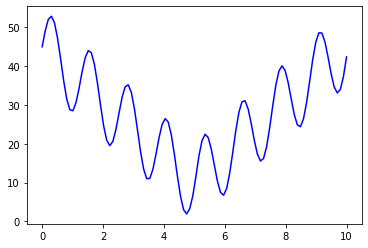

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
def fun(x):
    return 10*np.sin(5*x)+7*np.abs(x-5)+10
x=np.linspace(0,10,100)
print(x)
y=fun(x)
print(y)
plt.plot(x,y,'b-',label='函数图像')
plt.show()